In [136]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [137]:
df = pd.read_excel("HomePrice-2.xlsx")
df.head(5)
# Preview file

,Column1,City,Price,Area,Location,No. of Bedrooms
0,0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,3,Bangalore,8358000,1675,Doddanekundi,3
4,4,Bangalore,6845000,1670,Kengeri,3


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Column1          1135 non-null   int64 
 1   City             1135 non-null   object
 2   Price            1135 non-null   int64 
 3   Area             1135 non-null   int64 
 4   Location         1135 non-null   object
 5   No. of Bedrooms  1135 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 53.3+ KB


In [139]:
df.isna().sum()
# Clean data, no null values

Column1            0
City               0
Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64

In [140]:
df.columns
# Names of all columns

Index(['Column1', 'City', 'Price', 'Area', 'Location', 'No. of Bedrooms'], dtype='object')

In [141]:
df.rename(columns={'Column1':'index'},inplace= True)
df.head(20)

,index,City,Price,Area,Location,No. of Bedrooms
0,0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,3,Bangalore,8358000,1675,Doddanekundi,3
4,4,Bangalore,6845000,1670,Kengeri,3
5,5,Bangalore,6797000,1220,Horamavu,2
6,6,Bangalore,20000000,2502,Thanisandra,4
7,7,Bangalore,7105000,1438,Ramamurthy Nagar,3
8,8,Bangalore,8405000,1405,Whitefield Hope Farm Junction,3
9,9,Bangalore,3506000,660,Electronic City Phase 1,1


In [142]:
df.shape

(1135, 6)

In [143]:
df.drop(['index'], axis=1, inplace = True)

In [144]:
df.describe()

,Price,Area,No. of Bedrooms
count,1.135000e+03,1135.000000,1135.000000
mean,1.040893e+07,1546.042291,2.533040
std,1.534382e+07,854.927703,0.682685
min,2.096000e+06,525.000000,1.000000
25%,4.928000e+06,1148.000000,2.000000
50%,6.845000e+06,1340.000000,3.000000
75%,9.905000e+06,1624.500000,3.000000
max,2.027000e+08,9900.000000,5.000000


In [145]:
print(df.groupby('City').size())

City
Bangalore    1135
dtype: int64


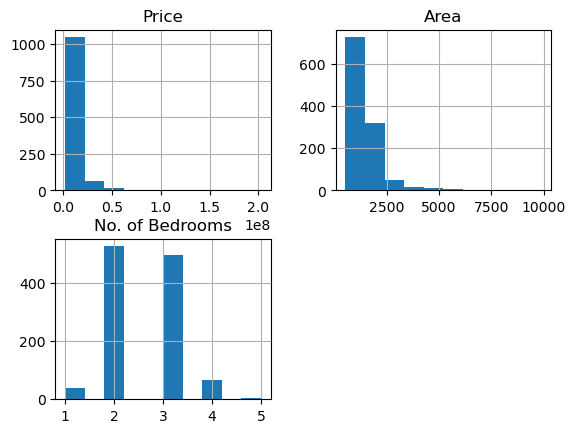

In [146]:
df.hist()
pyplot.show()

In [147]:
df.nunique()

City                 1
Price              853
Area               613
Location            95
No. of Bedrooms      5
dtype: int64

In [148]:
df.Location.unique()

array(['JP Nagar Phase 1', 'Dasarahalli on Tumkur Road',
       'Kannur on Thanisandra Main Road', 'Doddanekundi', 'Kengeri',
       'Horamavu', 'Thanisandra', 'Ramamurthy Nagar',
       'Whitefield Hope Farm Junction', 'Electronic City Phase 1',
       'Yelahanka', 'Anjanapura', 'Jalahalli', 'Kasavanahalli',
       'Bommasandra', 'Bellandur', 'RR Nagar', 'Begur', 'Hosa Road',
       'Sahakar Nagar', 'Kadugodi', 'Jakkur', 'Jigani', 'Krishnarajapura',
       'Brookefield', 'Banashankari', 'Nelamangala', 'Attibele',
       'Banaswadi', 'Kodigehalli', 'ITPL', 'Uttarahalli Hobli',
       'Chikkagubbi on Hennur Main Road', 'Varthur', 'Vidyaranyapura',
       'Electronic City Phase 2', 'J. P. Nagar', 'K. Chudahalli',
       'Narayanaghatta', 'Anekal City', 'Sarjapur', 'Koramangala',
       'Hebbal', 'Budigere Cross', 'Bommanahalli', 'Electronics City',
       'Chikkalasandra', 'Kogilu', 'Nayandahalli', 'Bilekahalli',
       'Muneshwara Nagar', 'Junnasandra',
       'Narayanapura on Hennur Ma

In [149]:
df1 = df[["Location", "City"]]

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns

for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [151]:
feature_columns=['City', 'Area', 'Location', 'No. of Bedrooms']
X=df[feature_columns]
X

,City,Area,Location,No. of Bedrooms
0,0,3340,37,4
1,0,1045,21,2
2,0,1179,55,2
3,0,1675,23,3
4,0,1670,57,3
...,...,...,...,...
1130,0,1535,91,3
1131,0,1485,91,3
1132,0,1080,8,2
1133,0,1047,14,2


In [152]:
y=df['Price']
y

0       30000000
1        7888000
2        4866000
3        8358000
4        6845000
          ...   
1130     8434000
1131     8509000
1132     5426000
1133     8400000
1134    16200000
Name: Price, Length: 1135, dtype: int64

In [162]:
lb=LabelEncoder()
y=lb.fit_transform(y)

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4,shuffle=True)

In [164]:
X_train

,City,Area,Location,No. of Bedrooms
1065,0,1917,50,3
428,0,1175,26,2
398,0,893,25,2
445,0,1124,83,2
592,0,1215,70,3
...,...,...,...,...
456,0,1388,83,3
360,0,1447,35,2
709,0,1890,35,3
439,0,1330,26,3


In [165]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [166]:
dt.score(X_test,y_test)

0.5334930596597145

In [167]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [168]:
rf.score(X_test,y_test)

0.758225175446366

In [169]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [170]:
lr.score(X_test,y_test)

0.4095115226037451